In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Created Dataframes of all the available  dataset.

In [ ]:
d_sp_sens = pd.read_csv('C:/Users/xbhi0/OneDrive/Desktop/machine learning/Projecto/measure1_smartphone_sens.csv')
d_sw_sens = pd.read_csv('C:/Users/xbhi0/OneDrive/Desktop/machine learning/Projecto/measure1_smartwatch_sens.csv')
d_sp_sens2 = pd.read_csv('C:/Users/xbhi0/OneDrive/Desktop/machine learning/Projecto/measure2_phone_sens.csv')
d_sw_sens2 = pd.read_csv('C:/Users/xbhi0/OneDrive/Desktop/machine learning/Projecto/measure2_watch_sens.csv')

Adding a target column to the datasets, having value '1' for smartphone data and value '0' for smartwatch

In [ ]:
l =np.ones(len(d_sp_sens),dtype=int)
l2=np.zeros(len(d_sw_sens),dtype=int)

In [ ]:
d_sp_sens['target']=pd.DataFrame(l)
d_sp_sens2['target'] = pd.DataFrame(l)
d_sw_sens['target'] = pd.DataFrame(l2)
d_sw_sens2['target']=pd.DataFrame(l2)

Merging all the dataset to One.

In [ ]:
pre_final_data = d_sp_sens.append([d_sp_sens2,d_sw_sens,d_sw_sens2])

In [ ]:
pre_final_data

The following step is performed so as to randomize the rows of dataset to facilicate classification more efficiently.

In [ ]:
pre_final_data = pre_final_data.sample(frac = 1)

In [ ]:
pre_final_data

Now, preparing our model for training and testing.

In [ ]:
x = pre_final_data.iloc[:,:-1].values
y = pre_final_data.iloc[:,-1].values
y

In [ ]:
x

Spitting the dataset into training data and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

In [ ]:
X_test

Performing Standardization to standardize the values of dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

We took use of principal component analysis (PCA) for reduce the no. of columns and choosing those columns which are more relevant and useful for classificatin purpose.

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 7)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

Now, performing Logistic Regression on the data to classify whether the data is from a smartphone or smartwatch.

In [ ]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)

Getting the classifcation report to check the performance of our model.

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm

In [ ]:
from sklearn.metrics import f1_score

f1_LR = f1_score(y_test,y_pred)
f1_LR

In [ ]:
A1 = accuracy_score(y_test,y_pred)
A1

# NAIVE BAISE 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
obj = GaussianNB()

obj.fit(X_train,y_train)


In [ ]:
y_pred_NB = obj.predict(X_test)

In [ ]:
y_pred_NB

In [ ]:
cm_NB = confusion_matrix(y_test,y_pred_NB)
cm_NB

In [ ]:
print(classification_report(y_test,y_pred_NB))

In [ ]:
f1_NB = f1_score(y_test,y_pred_NB)
f1_NB

In [ ]:
A2 = (accuracy_score(y_test,y_pred_NB))
print(A2)

# Now, performing KNN (K - Nearest Neighbour ) Algorithm.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

In [ ]:
y_pred_KNN = knn.predict(X_test)

In [ ]:
y_pred_KNN

In [ ]:
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_KNN

In [ ]:
print(classification_report(y_test,y_pred_KNN))

In [ ]:
f1_KNN = f1_score(y_test,y_pred_KNN)
f1_KNN

In [ ]:
A3 = accuracy_score(y_test,y_pred_KNN)
A3

# DECISION TREE ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
y_pred_DT = tree_classifier.predict(X_test)


In [ ]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
tree_classifier.predict_proba(X_test)

In [ ]:
# y_pred_DT_prob

In [ ]:
y_pred_DT

In [ ]:
cm_DT = confusion_matrix(y_test,y_pred_DT)
cm_DT

In [ ]:
print(classification_report(y_test,y_pred_DT))

In [ ]:
f1_DT = f1_score(y_test,y_pred_DT)
f1_DT

In [ ]:
from sklearn.metrics import precision_score

ps_DT = precision_score(y_test,y_pred_DT)
ps_DT

In [ ]:
A4 = accuracy_score(y_test,y_pred_DT)
A4

# RANDOM FOREST also performed BOOTSTRAP

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=100,bootstrap=True)
RF_classifier.fit(X_train,y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
y_pred_RF

In [ ]:
cm_RF = confusion_matrix(y_test,y_pred_RF)
cm_RF

In [ ]:
print(classification_report(y_test,y_pred_RF))

In [ ]:
A5 = accuracy_score(y_test,y_pred_RF)
A5

In [ ]:
f1_RF = f1_score(y_test,y_pred_RF)
f1_RF

why one algorithm is performing better  than other algo
compare the results

In [ ]:
accuracy_list = [A1,A2,A3,A4,A5]
accuracy_list

In [ ]:
f1_score_list = [f1_LR,f1_NB,f1_KNN,f1_DT,f1_RF]
f1_score_list

In [ ]:
df_compare = pd.DataFrame([accuracy_list,f1_score_list],columns=['Logistic_Regression','Naive_Bayes','KNN','Decision_Tree','Random_Forest'],index=['accuracy','f1_score'])
df_compare

In [ ]:
print(df_compare.max(axis=1))

from this we get to know that we get the best performance by using random forest algorithm.

The following are the reasons whu random forest may have better performance results as compared to other algorithms:

-Random forest can handle missing values automatically.
-Random forest can handle outliers automatically.
-The algorithm is very stable. If a new data point is introduced in the dataset, the overall algorithm is not impacted much since the new data   may affect only one tree, but it is improbable to affect all trees.
-Random forest is comparatively less affected by noise.

# clustering

In [ ]:
print(x.shape)

In [ ]:
print(type(x))

In [ ]:
new_d = pd.DataFrame(x,columns= (i for i in range(1,14)))
new_d

In [ ]:
new_d[2]

In [121]:
x1 = np.array(new_d[2])
x1 = np.transpose(x1)

x2 = np.array(new_d[8])
x2 = np.transpose(x2)


data = {
    '1':x1,
    '2':x2
}

In [123]:
dff = pd.DataFrame(data)
dff

,1,2
0,-0.292,323.292
1,5.420,65.548
2,-0.187,25.463
3,-8.709,230.171
4,-0.855,351.044
...,...,...
152883,-1.106,132.371
152884,2.346,160.733
152885,-0.474,326.465
152886,4.878,266.279


In [124]:
from sklearn.cluster import KMeans


cluster_data = pd.DataFrame(data)
kmeans = KMeans(n_clusters=2).fit(cluster_data)
centroids = kmeans.cluster_centers_
print(centroids)


[[  1.00274987 302.00276918]
 [  1.44139518  76.09792828]]


we got the centroids for the clusters

In [129]:
y_km = kmeans.fit_predict(cluster_data)
y_km

array([0, 1, 1, ..., 0, 0, 1])

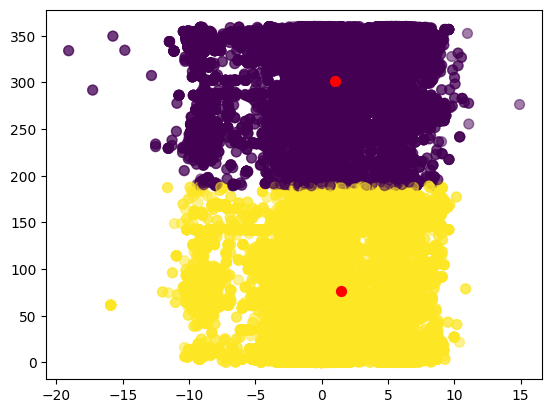

In [130]:
plt.scatter(cluster_data['1'], cluster_data['2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [1]:
from sklearn.metrics.cluster import pair_confusion_matrix

pair_confusion_matrix(y_km)

NameError: name 'y_km' is not defined